# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_df = pd.merge(study_results , mouse_metadata , how="left", on="Mouse ID")
#mice_df.info()
# Display the data table for preview
mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
#number_of_mice = len(mice_df["Mouse ID"].unique())
#number_of_mice = mice_df['Mouse ID'].value_counts()
count_mice = mice_df["Mouse ID"].nunique()
count_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mice_df.loc[mice_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
#mice_df = mice_df.set_index('Mouse ID')
#mice_df.loc['g989']
duplicat_row_series = mice_df["Mouse ID"].isin(duplicate_mice)
all_duplicate_rows = mice_df.loc[duplicat_row_series]
all_duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
clean_df = mice_df.loc[~duplicat_row_series]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = clean_df.groupby(['Drug Regimen'])

summary_mean = summary_df['Tumor Volume (mm3)'].mean()
summary_med = summary_df['Tumor Volume (mm3)'].median()
summary_var = summary_df['Tumor Volume (mm3)'].var()
summary_std = summary_df['Tumor Volume (mm3)'].std()
summary_sem = summary_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
                        "Mean Tumor Volume": summary_mean,
                        "Median Tumor Volume" : summary_med,
                        "Tumor Volume Variance" : summary_var,
                        "Tumor Volume Std. Dev." : summary_std,
                        "Tumor Volume Std. Err." : summary_sem
                        })
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_agg_df = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

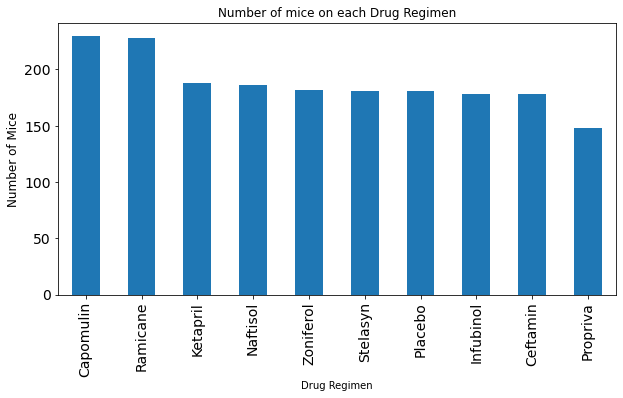

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint.sort_values(ascending=False).plot.bar(figsize=(10,5), title ="Number of mice on each Drug Regimen",fontsize = 14)  
plt.ylabel("Number of Mice",fontsize = 12)
plt.show()

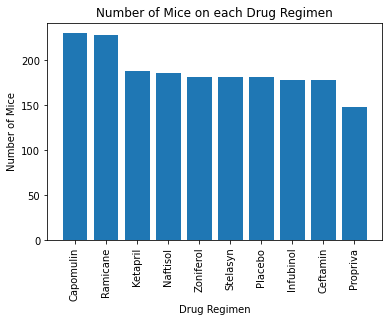

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint_desc = timepoint.sort_values(ascending=False)                # sorted values
plt.bar(timepoint_desc.index, timepoint_desc.values)                   # used pyplot function
plt.title("Number of Mice on each Drug Regimen")                       # adding Title
plt.xlabel('Drug Regimen', size=10)                                 # define x label
plt.ylabel('Number of Mice', size=10)                            # define y label
plt.xticks(rotation='vertical')                                        # this is to rotate the x values
plt.show()

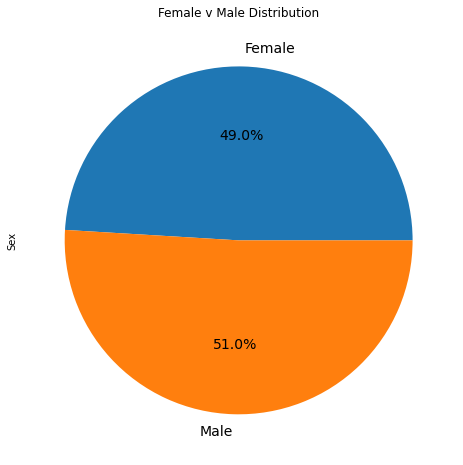

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# grouped by sex and then did a count
# plotted chart using pandas .plot.pie() with customizations
sex = clean_df.groupby(['Sex'])['Sex'].count()           
sex.plot.pie(title="Female v Male Distribution",autopct='%1.1f%%', figsize=(8, 8),fontsize = 14)   

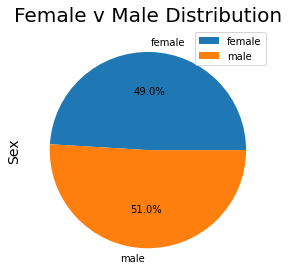

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=('female', 'male'), autopct='%1.1f%%')
plt.title("Female v Male Distribution",fontsize = 20)                         # Title the pie chart
plt.ylabel('Sex', size=14)                                           # labeled the pie chart
plt.tight_layout()                                             # used to make it look better
plt.legend(loc= "best")                                        # adding legend best location
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = clean_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()
greatest_tp

Drug Regimen  Mouse ID
Capomulin     b128        45
              b742        45
              f966        20
              g288        45
              g316        45
                          ..
Zoniferol     q633        45
              s337        45
              w140         5
              w575        45
              x613        15
Name: Timepoint, Length: 248, dtype: int64

In [14]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_tp_df = pd.DataFrame(greatest_tp)
greatest_tp_df = pd.merge(greatest_tp_df, clean_df, on=('Drug Regimen', 'Mouse ID', 'Timepoint'), how='left')
#greatest_tp_df.info()
greatest_tp_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [15]:
greatest_tp_df = greatest_tp_df.reset_index()

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment= ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment:
    volume_df = greatest_tp_df.loc[greatest_tp_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    
# Determine Quartiles, IQR, Lower Bound, Upper Bound    
    quartiles = volume_df.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

# Determine outliers using upper and lower bounds
    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]

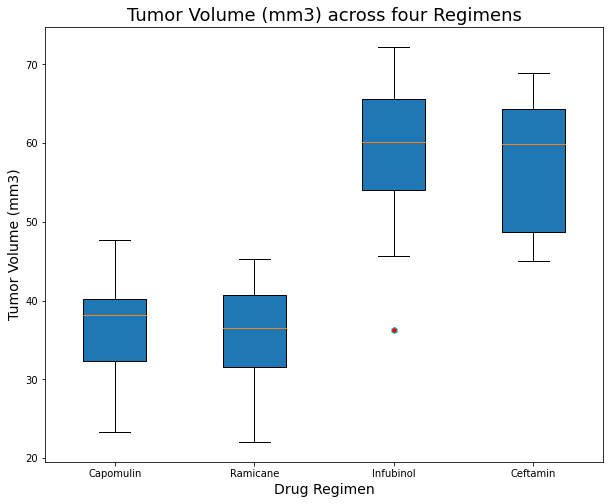

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_dot = dict(markerfacecolor="r",marker="h", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.boxplot(tumor_vol, flierprops=red_dot, patch_artist=True)
ax1.set_title("Tumor Volume (mm3) across four Regimens",fontsize =18)
ax1.set_xlabel("Drug Regimen",fontsize = 14)
ax1.set_ylabel("Tumor Volume (mm3)",fontsize = 14)
ax1.xaxis.set(ticks=range(1,len(treatment) + 1),ticklabels=treatment)

plt.show()

## Line and Scatter Plots

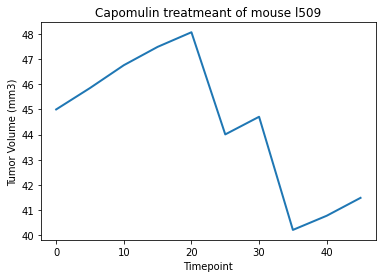

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin , 
#Mouse ID l509

line_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_df

time = line_df["Timepoint"]
vol = line_df["Tumor Volume (mm3)"] 
#label = random_df["Mouse ID"].unique()

#print(random_mouse["Mouse ID"])
line, = plt.plot(time, vol, linewidth=2, markersize=12)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of mouse l509")
#plt.xlim(0, time.max() + 5)
#plt.ylim(vol.min() - 5, vol.max() + 5)
#plt.legend("Mouse ID" +label)
plt.show()

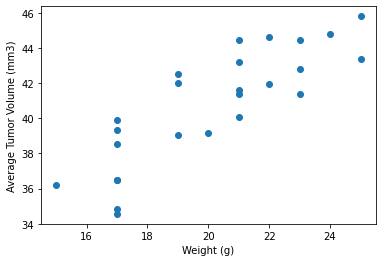

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
# use groupby() and mean() to create a dataframe
vol_avg = scatter_df.groupby(['Mouse ID']).mean()
# created scatter plot of the x axis (weight) and the y axis (tumor size) by calling from the vol_avg dataframe
plt.scatter(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
vol_avg

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [21]:
# calculating linear regression values using st.linregress() function passing parameters from the capavg dataframe
lin_reg=st.linregress(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])
lin_reg

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [22]:
slope=0.9544396890241045
intercept=21.552160532685015 
rvalue=0.8419363424694718
pvalue=1.3225722434712642e-07 
stderr=0.1275435903320134

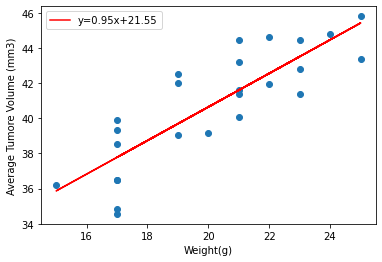

In [23]:
# ploting the regression line
# calculate the the linear line plot list of values
line = slope*(vol_avg['Weight (g)'])+intercept
# create the scatter plot like above
plt.scatter(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])
# plot the linear regression line which is the averaged line of all the values in red
# i used the .format() function to create a label of the red line using the slope and intercept from above
plt.plot(vol_avg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
# included legend with the redline slope formula using plt.legend()
plt.legend()
#plt.savefig('linearregression')
plt.show()